In [1]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')

In [3]:
data.drop(['Config','Ecoh','Eb','Eadh'], axis=1, inplace=True)

In [4]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

scaler_x=StandardScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)



scaler_y=StandardScaler()
y=y.values.reshape(-1,1)
y_scaled=scaler_y.fit(y)
y_scaled=scaler_y.transform(y)

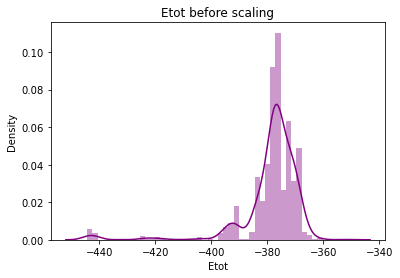

In [32]:
sns.distplot(y, color='purple')
plt.xlabel('Etot')
plt.title('Etot before scaling');

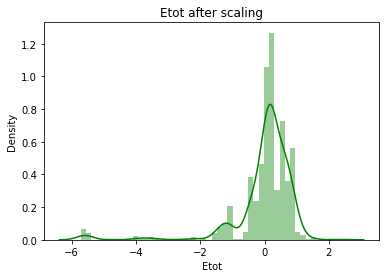

In [33]:
sns.distplot(y_scaled, color='green')
plt.xlabel('Etot')
plt.title('Etot after scaling');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.2, random_state=0)

In [8]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Model Evaluation 

In [9]:
regressor.coef_

array([[-1.15240735, -0.06435512, -0.10167378,  0.17017884,  0.17512446,
         0.1374402 ,  0.07163217, -0.1909577 ,  0.37065443, -0.14157258,
         0.01525181]])

In [10]:
regressor.intercept_

array([0.00257574])

In [11]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8782352861215775


In [12]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8589224840048023


In [13]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [14]:
score.mean()

-0.04860143048299885

In [15]:
#coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
#coeff_df

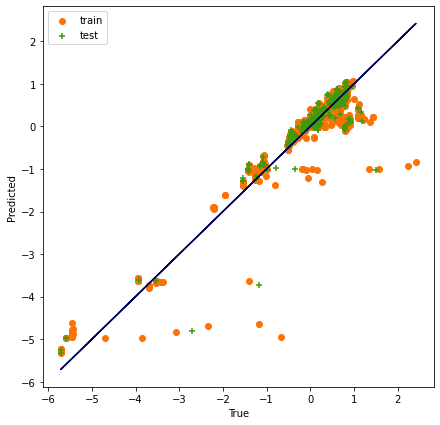

In [16]:
prediction_test=regressor.predict(X_test)
prediction_train=regressor.predict(X_train)



plt.figure(figsize=(7,7))
plt.scatter(y_train,prediction_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,prediction_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

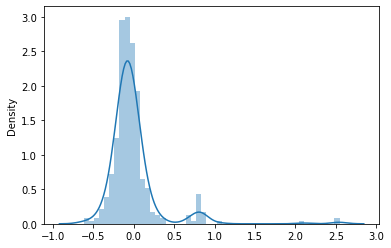

In [17]:
sns.distplot(y_test-prediction_test);

In [18]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, prediction_test),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, prediction_test),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
print('R_squared:'+ str(round(r2_score(y_test,prediction_test),2)))

MAE: 0.18
MSE: 0.11
RMSE:0.32
R_squared:0.86


### Linear regression using statsmodel 

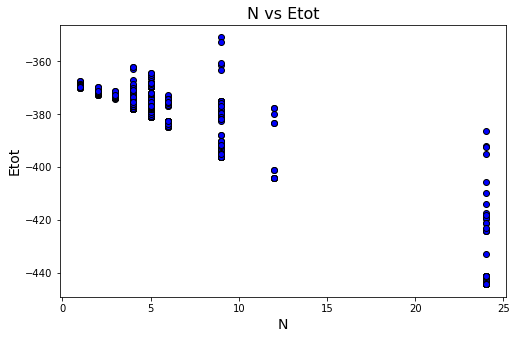

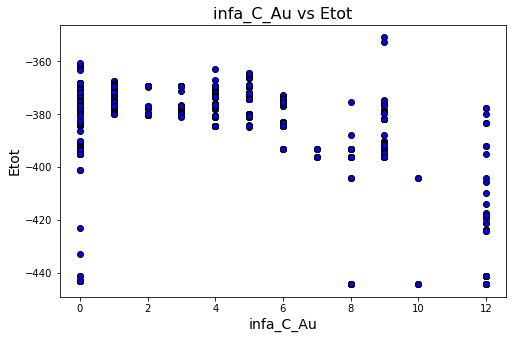

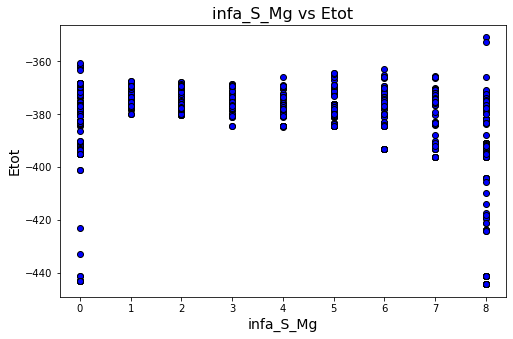

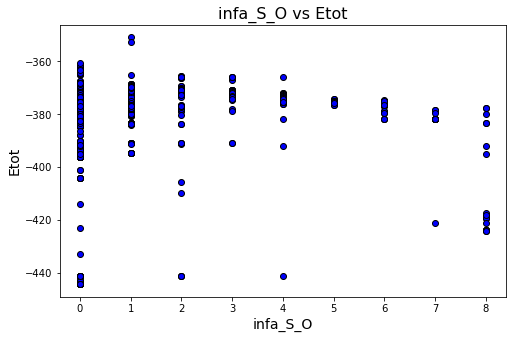

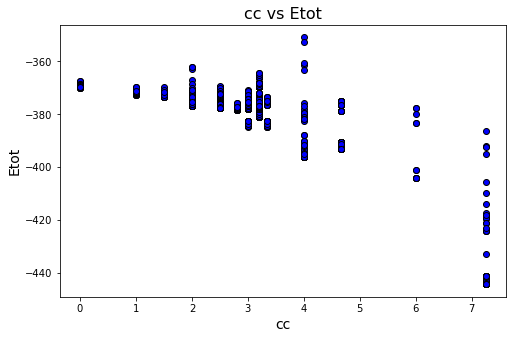

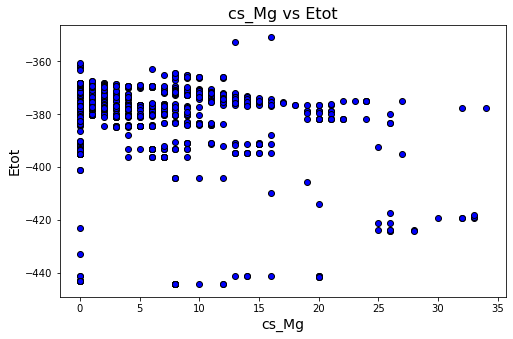

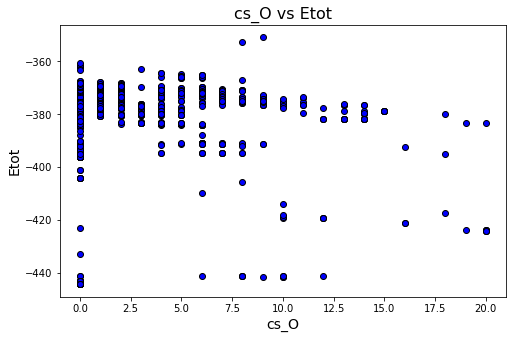

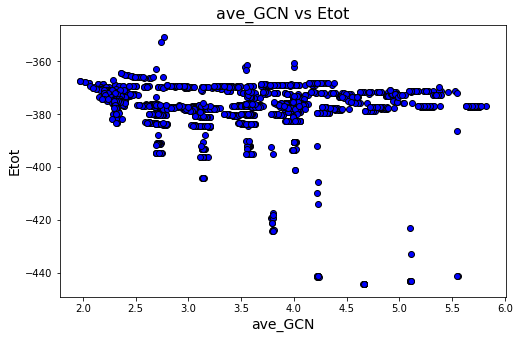

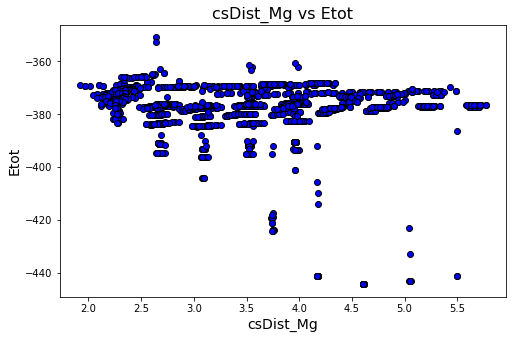

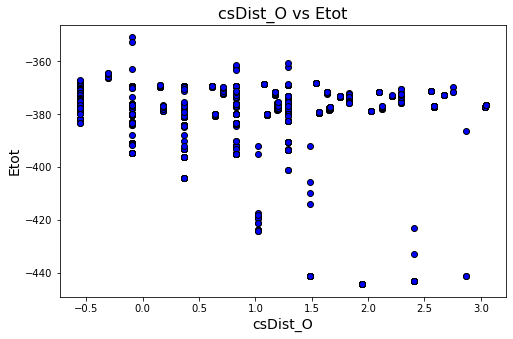

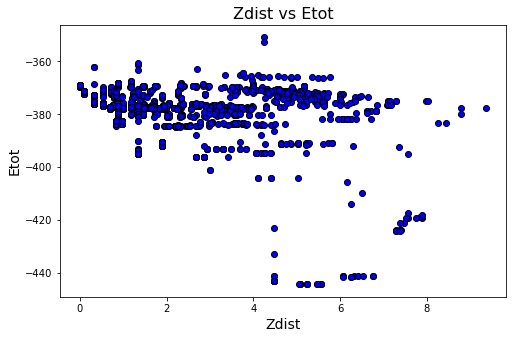

In [19]:
for c in data.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs Etot".format(c),fontsize=16)
    plt.scatter(x=data[c], y=data['Etot'], color='blue', edgecolor='k')
    plt.grid(False)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Etot',fontsize=14)
    plt.show()

In [20]:
formular_str=data.columns[-1]+'~'+'+'.join(data.columns[:-1])
formular_str

'Etot~N+infa_C_Au+infa_S_Mg+infa_S_O+cc+cs_Mg+cs_O+ave_GCN+csDist_Mg+csDist_O+Zdist'

In [21]:
model=sm.ols(formula=formular_str,data=data)

In [22]:
fitted=model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Etot   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1170.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:18:19   Log-Likelihood:                -5181.7
No. Observations:                1839   AIC:                         1.039e+04
Df Residuals:                    1827   BIC:                         1.045e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -371.6965     11.329    -32.810      0.0

In [23]:
coefs = pd.DataFrame({
    'coef': fitted.params.values,
    'odds ratio': np.exp(fitted.params.values),
    'pvalue': fitted.pvalues,
    'name': fitted.params.index
}).sort_values(by='pvalue', ascending=False)
df=coefs[coefs.pvalue < 0.05].drop('Intercept')
#df1 = df1.round(decimals=10)
df.reset_index(drop=True, inplace=True)
print ((df['name']).to_string(index=False))

csDist_Mg
    cs_Mg
infa_S_Mg
     cs_O
 infa_S_O
       cc
        N


In [24]:
df_result=pd.DataFrame()
df_result['pvalues']=fitted.pvalues[1:]

In [25]:
df_result['Features']=data.columns[:-1]
df_result.set_index('Features',inplace=True)
df_result

,pvalues
Features,
N,0.000000e+00
infa_C_Au,3.387449e-01
infa_S_Mg,5.384477e-04
infa_S_O,5.470690e-18
cc,6.380227e-19
cs_Mg,2.312697e-03
cs_O,1.965162e-04
ave_GCN,3.258552e-01
csDist_Mg,2.563227e-02


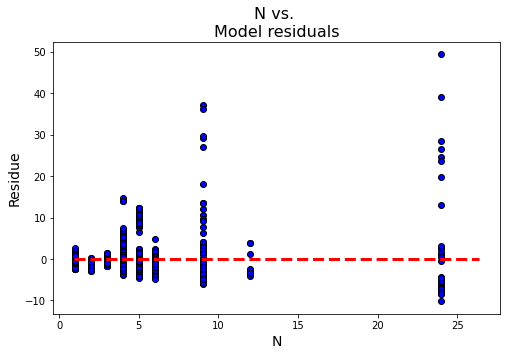

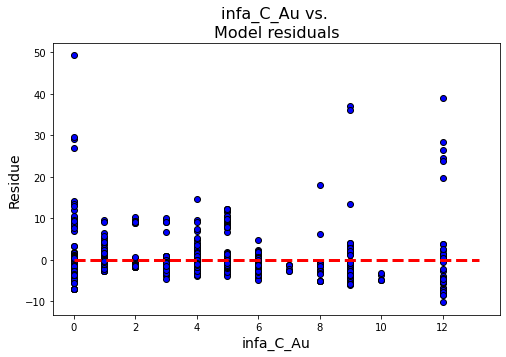

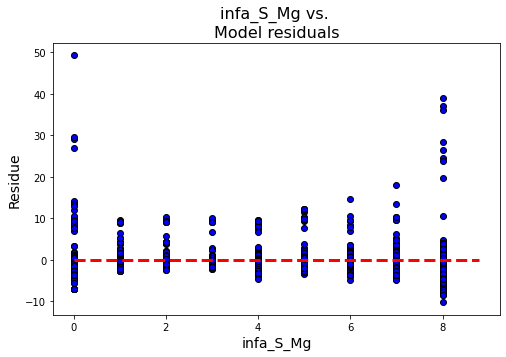

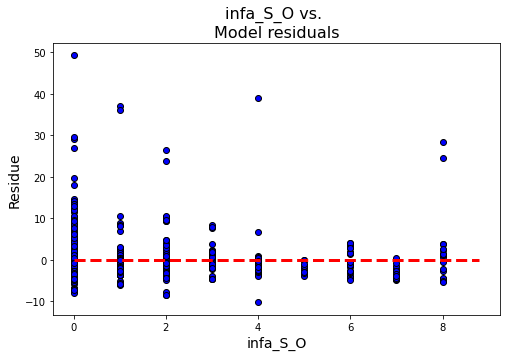

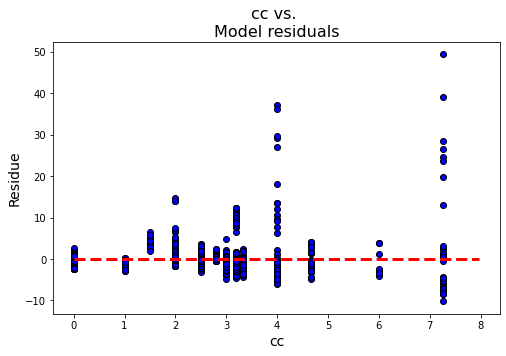

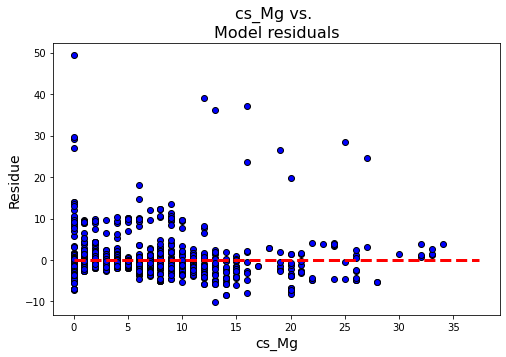

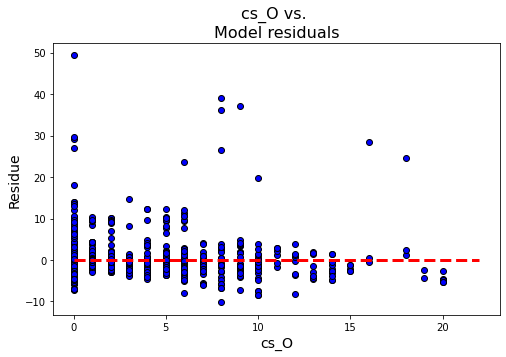

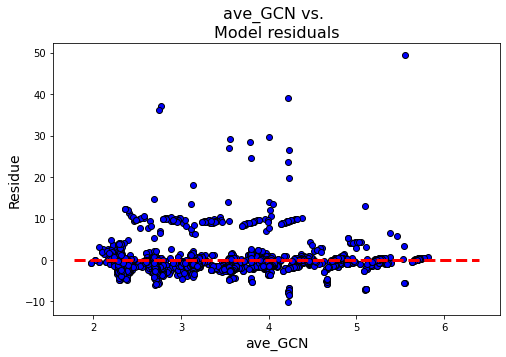

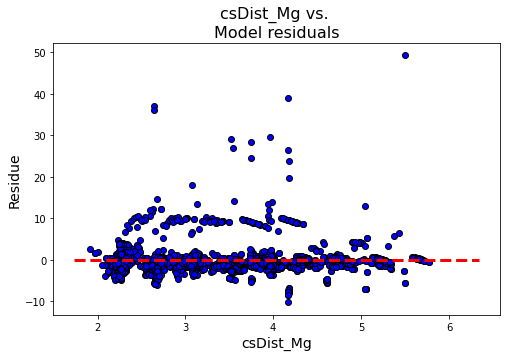

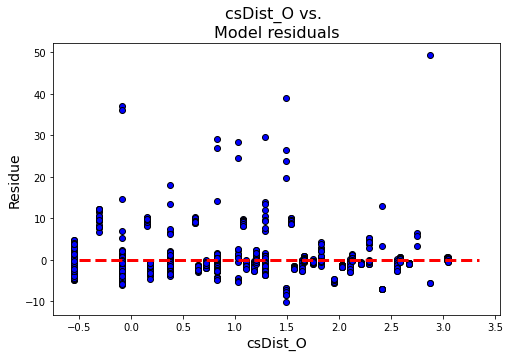

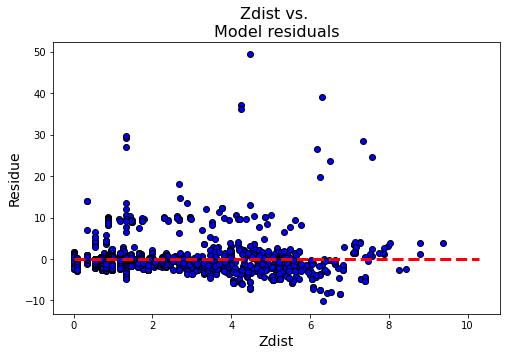

In [26]:
#Residual vs predicting variables plots #

for c in data.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title('{} vs. \nModel residuals'.format(c), fontsize=16)
    plt.scatter(x=data[c],y=fitted.resid,color='blue', edgecolor='k')
    xmin=min(data[c])
    xmax=max(data[c])
    plt.hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('Residue', fontsize=14)
    plt.show()

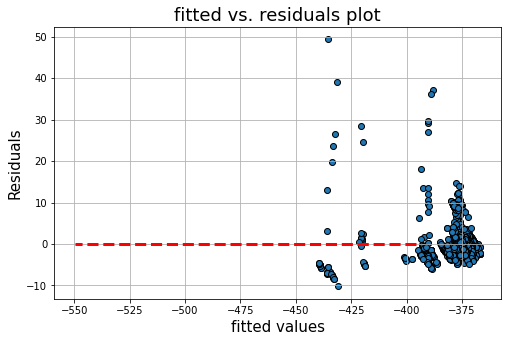

In [27]:
# fitted vs residuals 

plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid, edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax=max(fitted.fittedvalues)
plt.hlines(y=0, xmin=xmin*0.9,xmax=xmax*1.5,color='red', linestyle='--',lw=3)
plt.xlabel('fitted values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('fitted vs. residuals plot', fontsize=18)
plt.grid(True)
plt.show()

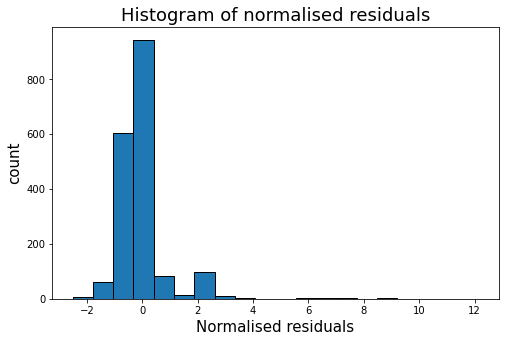

In [28]:
#Histogram of normalised residuals 

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson, bins=20, edgecolor='k')
plt.ylabel('count',fontsize=15)
plt.xlabel('Normalised residuals', fontsize=15)
plt.title('Histogram of normalised residuals', fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

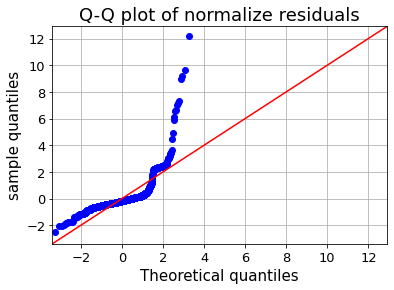

In [29]:
from statsmodels.graphics.gofplots import qqplot



plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson, line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Theoretical quantiles', fontsize=15)
plt.ylabel('sample quantiles', fontsize=15)
plt.title('Q-Q plot of normalize residuals',fontsize=18)
plt.grid(True)
plt.show();

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(data.columns[:-1])):
    v=vif(np.matrix(data[:-1]),i)
    print('variance inflation factor for {}:{}'.format(data.columns[i],round(v,2)))


variance inflation factor for N:41.51
variance inflation factor for infa_C_Au:30.35
variance inflation factor for infa_S_Mg:34.78
variance inflation factor for infa_S_O:7.28
variance inflation factor for cc:28.79
variance inflation factor for cs_Mg:32.42
variance inflation factor for cs_O:10.36
variance inflation factor for ave_GCN:3619.6
variance inflation factor for csDist_Mg:2229.54
variance inflation factor for csDist_O:1005.04
variance inflation factor for Zdist:43.83


Although the linear model is a classical model for regression analysis, it is based on some statistical assumptions which our dataset does not assume. 


1 The variables in the dataset show no linear relationship with the target variable as seen in the scatter plots 

2. There are many variables wiith vif>10 which indicates high multicollinearity 

3. The histogram of the normalised residulas and qq plots does not verify the normality assumption 



Significant variables 
